In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig

## Test Signal

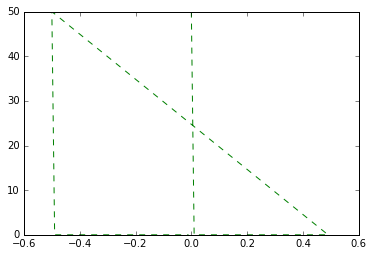

In [3]:
signal_len = 100
signal = np.ones(signal_len)
signal[np.arange(signal_len)%2 == 0] = 0 # alternates every timestep
fft = np.fft.fft(signal)
timestep = 1 # so we have a freq of .5Hz (b/c takes 2 timesteps per cycle)
freq_bins = np.fft.fftfreq(len(fft), d=timestep)
plt.plot(freq_bins, np.abs(fft), 'g--')
plt.show()

## Extract freq of data

None


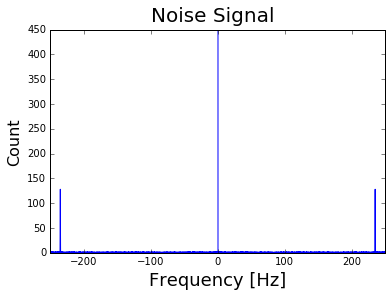

In [11]:
# %load signal-extractor.py
#!/usr/bin/env python
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import sys, os, IPython
from scipy import signal as sig


"""
Opens the grayscale images of a directory and concatenates them together.
"""
def get_frames(directory_name):
	image_names = glob(str(directory_name) + "/*")
	stream = plt.imread(image_names[0])[:,:,0]  # grayscale, so arbitrarily take 1 channel
	for name in image_names[1:]:
		frame = plt.imread(name)[:,:,0]
		stream = np.concatenate((stream, frame), axis=0)
	return stream


"""
Extracts the signal of the i-th pixel from the video stream.
"""
def extract_signal(stream, pixel=0):
	return stream[:, pixel]


"""
High pass filter to remove frequencies below 20 hz.
"""
def high_pass(signal, cutoff=20):
	hp_filter = sig.firwin(11, cutoff, pass_zero=False, nyq=9796)
	hp_filter /= np.sum(hp_filter)
	return sig.convolve(signal, hp_filter)


# plot freq response
def plot_fft(signal):
	fft = np.fft.fft(signal)
	timestep = 1/9795.9 # number of seconds between samples/lines
	freq_bins = np.fft.fftfreq(len(fft), d=timestep)
	f = plt.figure()
	plt.plot(freq_bins, np.abs(fft))
	f.suptitle('Noise Signal', fontsize=20)
	plt.xlabel('Frequency [Hz]', fontsize=18)
	plt.ylabel('Count', fontsize=16)
	plt.ylim([0, 450])
	plt.xlim([-250, 250])
	# plt.show()
	plt.savefig("data/plots/fft-5.png")
	return

# upsample to audio rate
# play it


"""
Main function for analyzing a video stream.
"""
def analyze_video(i):
	stream = get_frames("data/video " + str(i) + " frames")
	signal = extract_signal(stream, pixel=512)
	# filtered = high_pass(signal, 20)
	plot_fft(signal)
	# IPython.embed()
	return




if __name__ == "__main__":
    # print analyze_video(1)
    # print analyze_video(2)
    print analyze_video(1)

6.283185307179586